# K-Means (Unsupervised Learning)

source : <br>
https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning <br>
https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/ <br>
https://towardsdatascience.com/advanced-k-means-controlling-groups-sizes-and-selecting-features-a998df7e6745 <br>
https://realpython.com/k-means-clustering-python/<br>


#### K-Means Clustering Concept 

<p>K-Means Clustering is an Unsupervised Learning algorithm designed to organize an unlabelled dataset into clusters.


The basic concept is:  <br>
- It helps organize data into different groups without needing labels. This makes it easy to find natural patterns in the data, even if you don't have specific training information.

K-means clustering algorithm focuses on 2 tasks:

1. Finding the Best Centers (Centroids)
- Imagine you have a bunch of data points on a graph, and you want to group them into clusters.
- The algorithm starts by guessing where the centers of these groups might be (these are called centroids).
- It then adjusts these guesses through an iterative process to find the best locations for these centers.

2. Assigning Points to the Closest Center
- Now, for each data point, the algorithm figures out which centroid it's closest to.
- All the points close to a particular centroid are grouped together to form a cluster.
- This process continues until the centroids and clusters are in the best possible positions to represent the natural groupings in the data.

</p>

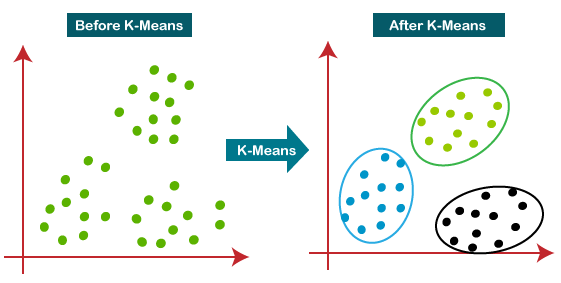

---

### Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


C:\Users\USER\AppData\Local\Temp\ipykernel_19940\4245898435.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### K-Means implementation using scikit-learn K-means package Using Dummy Data



#### Dummy Data

The dummy data is based on height and weight of individuals. By using Kmeans we can simply see k number of groups can be created and which point belong to a group


The data includes heights and weights of people. K-means is a tool to group similar people into "K" groups based on their height and weight. It helps identify patterns and quickly shows which individuals belong to the same group, making it easy to see similarities in their physical characteristics.

In [2]:
from sklearn.cluster import KMeans

# Data
height = [160, 155, 150, 165, 162, 175, 180, 178, 170, 175, 185, 190, 195, 190, 200, 198, 192, 170, 168, 172, 162, 185, 188, 176, 169, 173]
weight = [55, 50, 48, 60, 58, 70, 75, 72, 65, 68, 78, 80, 85, 82, 88, 86, 84, 65, 70, 72, 58, 80, 85, 78, 68, 70]

# Create a DataFrame with feature names
data = {'Height': height, 'Weight': weight}
df = pd.DataFrame(data, columns=['Height', 'Weight'])

### Choose number of cluster (K) - Change Here

In simple terms we can say choosing number of cluster means how many group you want to have. Try changing the num_cluster and see the visualization for better understanding

In [3]:
# K-means clustering
num_clusters = 4  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
df['Cluster'] = kmeans.fit_predict(df[['Height', 'Weight']])

### Visualize the Clustering process

These plots illustrate the progression of the K-means clustering process: 
from a raw scatter plot of the data points, through the inclusion of cluster centers (centroids), 
to a final plot where individuals are color-coded based on their assigned clusters.

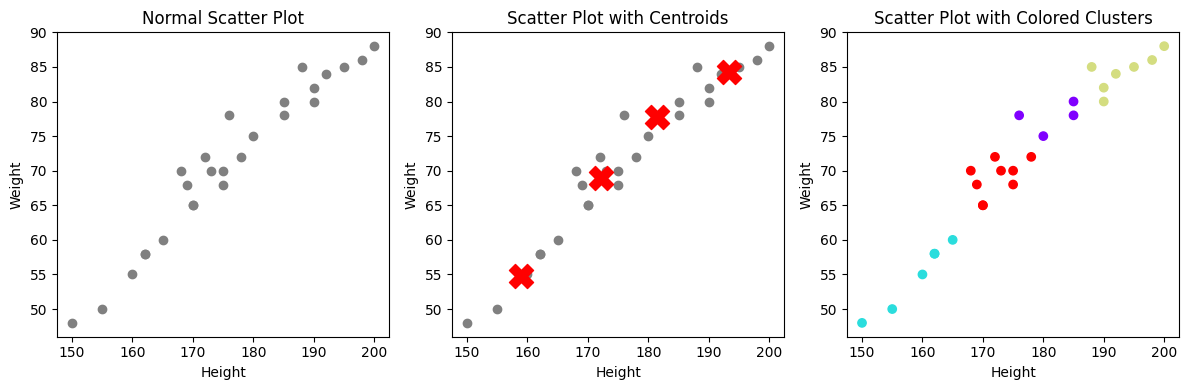

In [4]:

# Normal Scatter Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df['Height'], df['Weight'], c='gray', label='Data Points')
plt.title('Normal Scatter Plot')
plt.xlabel('Height')
plt.ylabel('Weight')

# Scatter Plot with Centroids
plt.subplot(1, 3, 2)
plt.scatter(df['Height'], df['Weight'], c='gray', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Scatter Plot with Centroids')
plt.xlabel('Height')
plt.ylabel('Weight')

# Scatter Plot with Colored Clusters
plt.subplot(1, 3, 3)
plt.scatter(df['Height'], df['Weight'], c=df['Cluster'], cmap='rainbow', label='Data Points')
plt.title('Scatter Plot with Colored Clusters')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.tight_layout()
plt.show()



### Elbow Method to find the optimal Number of Cluster(K)

 The idea is to evaluate the within-cluster sum of squares (WCSS) or inertia for different values of K and observe how it changes. WCSS measures how compactly the data points are grouped within their respective clusters.

 
In the context of K-means clustering, the Within-Cluster Sum of Squares (WCSS) is often measured using the "inertia" attribute of the KMeans class in scikit-learn. The "inertia" attribute represents the sum of squared distances between each data point and the centroid of its assigned cluster.

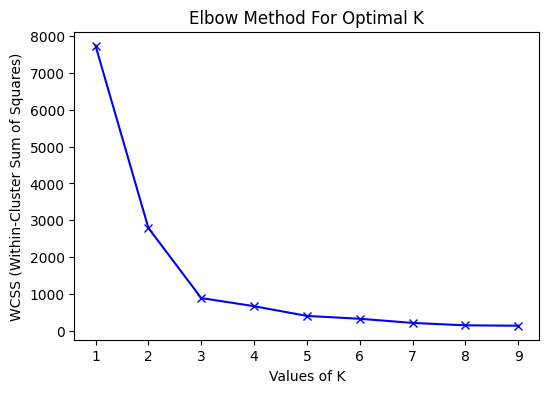

In [5]:
WCSS = []  # Within-Cluster Sum of Square i.e. Inertia
K = range(1, 10)

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df[['Height', 'Weight']])
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, WCSS, 'bx-')  # bx - blue color, 'x' marker
plt.xlabel('Values of K')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal K')
plt.show()



From the graph we can say that the Optimal K is 3

### Silhouette Analysis -  Assessing the quality of clusters 

- The value of the silhouette coefﬁcient is between [-1, 1].
- A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
- The worst value is -1. Values near 0 denote overlapping clusters.

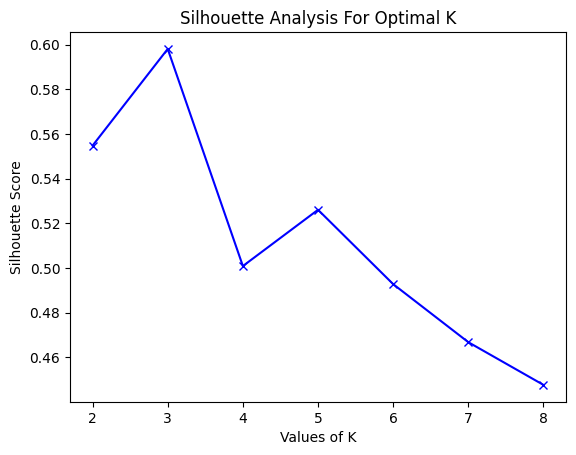

In [6]:
from sklearn.metrics import silhouette_score

# Range of cluster values to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7, 8] # you can change here to observe values of K

# List to store silhouette scores
silhouette_avg = []

# Iterate over different cluster values
for num_clusters in range_n_clusters:
    # Initialize K-means
    kmeans = KMeans(n_clusters=num_clusters)
    # Fit and predict clusters
    cluster_labels = kmeans.fit_predict(df[['Height', 'Weight']])
    # Calculate silhouette score
    silhouette_avg.append(silhouette_score(df[['Height', 'Weight']], cluster_labels))

# Plotting Silhouette Analysis results
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')
plt.show()

The highest Silhoutte score is the best which is 3 here. This would validate the previous elbow method.

#### Elbow Method vs Silhouette Analysis


Elbow Method:

Purpose: 
- Identify the optimal number of clusters by finding the "elbow" point where adding more clusters provides diminishing returns in clustering quality.
How It Works: 
- Examines the plot of within-cluster sum of squares (WCSS) or inertia against the number of clusters, choosing the K at the elbow.

Silhouette Analysis:

Purpose: 
- Assess cluster quality and separation, focusing on how well-defined and distinct clusters are.
How It Works: 
- Calculates silhouette scores for each point and the average for the dataset; a higher score indicates better-defined clusters.

<br><br>
In Conclusion, the Elbow Method guides the initial choice of clusters, pinpointing the diminishing returns point, while Silhouette Analysis validates and refines this selection by evaluating cohesion and separation. Together, they offer a comprehensive evaluation of clustering quality.

---

### Constrained K-Means: Controlling Group Size

Constrained K-Means optimally divides data into clusters while considering size constraints (min and max) for each group. This nuanced approach ensures effective clustering, balancing traditional within-cluster optimization with size limitations.

Real Life example: <br> <br>
 Think of allocating students to classrooms in a school. The government mandates a minimum class size for effective teaching, and each classroom has a maximum capacity based on physical space. Constrained K-Means helps efficiently assign students to classes, meeting both the minimum and maximum size requirements, optimizing space utilization while adhering to educational standards.

#### Generate synthetic data with 2 distinct cluster

In [7]:
from k_means_constrained import KMeansConstrained

# Generate synthetic data with two distinct clusters
np.random.seed(0)
cluster1 = np.random.normal(loc=[5, 5], scale=[1, 1], size=(20, 2))
cluster2 = np.random.normal(loc=[10, 10], scale=[1, 1], size=(30, 2))
data = np.concatenate([cluster1, cluster2])

# Create a DataFrame
df = pd.DataFrame(data, columns=['X1', 'X2'])

# Calculate the total number of data samples
total_samples = len(data)
print("Current number of data samples:", total_samples)

Current number of data samples: 50


#### Fit the KMeansConstrained model (CHANGE the attribute to experiment)

you can change: 
- number of cluster
- min size
- max size <br>
but please aware the total number of data samples above

In [8]:
# Initialize and fit the KMeansConstrained model
# Parameters:
#   n_clusters: Number of clusters to form
#   size_min: Minimum size constraint for each cluster
#   size_max: Maximum size constraint for each cluster
#   random_state: Seed for random number generation (for reproducibility)

## The product of size_min and n_clusters cannot exceed the number of samples 
## The product of size_max and n_clusters must be larger than or equal the number of samples 
clf = KMeansConstrained(n_clusters=4, size_min=12, size_max=20, random_state=0) # you can change here but aware of your number of data samples limit

# Fit the model and predict clusters for the DataFrame 'df'
labels = clf.fit_predict(df) 

#### Visualizing the results of the constrained K-means clustering

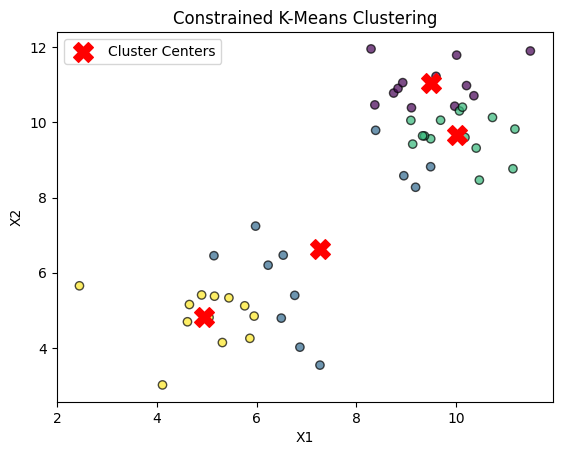

Cluster Centers:
[[ 9.49261679 11.04574813]
 [ 7.27457444  6.63254898]
 [10.02714626  9.65462509]
 [ 4.93783049  4.81968141]]

Cluster Labels:
[1 1 1 3 3 1 3 3 1 3 3 3 1 3 1 3 3 3 1 3 1 0 2 0 1 0 1 0 2 2 2 1 2 0 2 2 2
 2 2 2 0 2 0 2 0 0 0 0 0 2]


In [9]:
# Display the results
plt.scatter(df['X1'], df['X2'], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Constrained K-Means Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Print cluster centers and labels
print("Cluster Centers:")
print(clf.cluster_centers_)
print("\nCluster Labels:")
print(clf.labels_)


---
### Evaluating Clustering Performance Using Advanced Techniques

Here we are evaluating K-means with other clustering method. We use DBSCAN for Example.

Basic info about DBSCAN

Density-Based Clustering:
- DBSCAN groups points that are close to each other based on the idea of density.
It forms clusters where points are densely packed, and it's okay with different shapes.

Parameters:
- Epsilon (eps): Maximum distance to look for nearby points.
- Min Samples (min_samples): Minimum points needed to form a dense cluster.

Suitable Data:
- Best for spatial data, like locations on a map.
- Handles clusters of different shapes and sizes.
- Good for finding outliers (unusual points).

Advantages and Usage:
- No Need for Predefined Clusters:
  - DBSCAN figures out the number of clusters on its own.
- Common Uses:
  - Geospatial clustering, anomaly detection, image segmentation, and customer segmentation.

In summary, DBSCAN is a smart clustering tool that finds groups in data based on how densely points are packed. 
It's great for spatial data and doesn't need you to tell it how many groups there are. 
Adjusting eps and min_samples helps it work well for different situations.



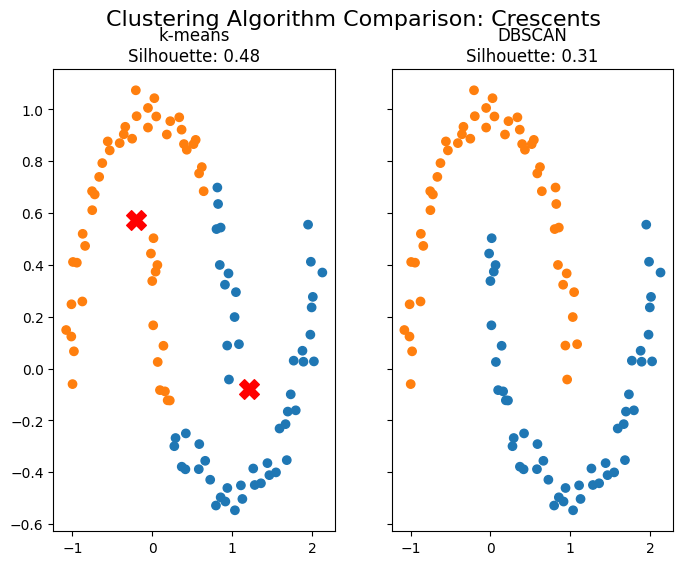

In [10]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate crescent-shaped data
X, _ = make_moons(n_samples=100, noise=0.05, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Height', 'Weight'])

# Clustering using k-means with 3 clusters
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['KMeans_Labels'] = kmeans.fit_predict(df[['Height', 'Weight']])

# Clustering using DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
df['DBSCAN_Labels'] = dbscan.fit_predict(df[['Height', 'Weight']])

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(df[['Height', 'Weight']], df['KMeans_Labels']).round(2)
dbscan_silhouette = silhouette_score(df[['Height', 'Weight']], df['DBSCAN_Labels']).round(2)

# Visualize the crescent-shaped clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)

# Automatically generate colors for clusters
cluster_colors = plt.cm.tab10(np.arange(n_clusters))

# The k-means plot
ax1.scatter(df['Height'], df['Weight'], c=cluster_colors[df['KMeans_Labels']])
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Centroids')
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot
db_colors = cluster_colors[df['DBSCAN_Labels']]
ax2.scatter(df['Height'], df['Weight'], c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

plt.show()


#### What can we obeserve here ?

On the left, K-Means struggled to understand the crescent shapes in our data (Silhouette score: 0.48). It mistakenly put some dots in the wrong groups, thinking they belonged elsewhere. The orange and blue groups, along with the red 'X' marks (centers), show where it got confused.

On the right, DBSCAN did a better job figuring out the crescent shapes (Silhouette score: 0.31). Even though its score is lower, it grouped dots more accurately according to how they're naturally arranged. Some dots are labeled as noise, but it's still better at capturing the real clusters.

Crescents make it tough for K-Means because it assumes all groups are like balls. DBSCAN is smarter with more flexible group shapes. Although K-Means got a higher score, DBSCAN gives a more sensible grouping for this data. This shows why choosing the right method matters based on how your data looks.

---
#### For this dataset which clustering method should we use ?

In this dataset with crescent shapes, DBSCAN outshines K-Means. Even though K-Means got a higher score, it struggled with the crescent shapes, mixing up some dots in the wrong groups. On the other hand, DBSCAN did a better job understanding the natural arrangement of the data, grouping dots more accurately within the crescents. So, for this kind of data, DBSCAN is the better choice.